In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

All layers have a position adjustment that resolves overlapping geoms. Override the default by using the position argument to the `geom_` or `stat_` function.

<img src = './ggplot2_position_adjustment.png'/>

In [7]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [2]:
setwd('C:/Users/dell/PycharmProjects/MachineLearning/Pandas/datasets')
getwd()

[1] "C:/Users/dell/PycharmProjects/MachineLearning/Pandas/datasets"

In [3]:
titanic <- read.csv('./titanic.csv')
head(titanic)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [4]:
tips <- read.csv('./tips.csv')
head(tips)

X,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


# Don't adjust position

**`position_identity()`**: do not adjust position

In [5]:
args(position_identity)

function () 
NULL

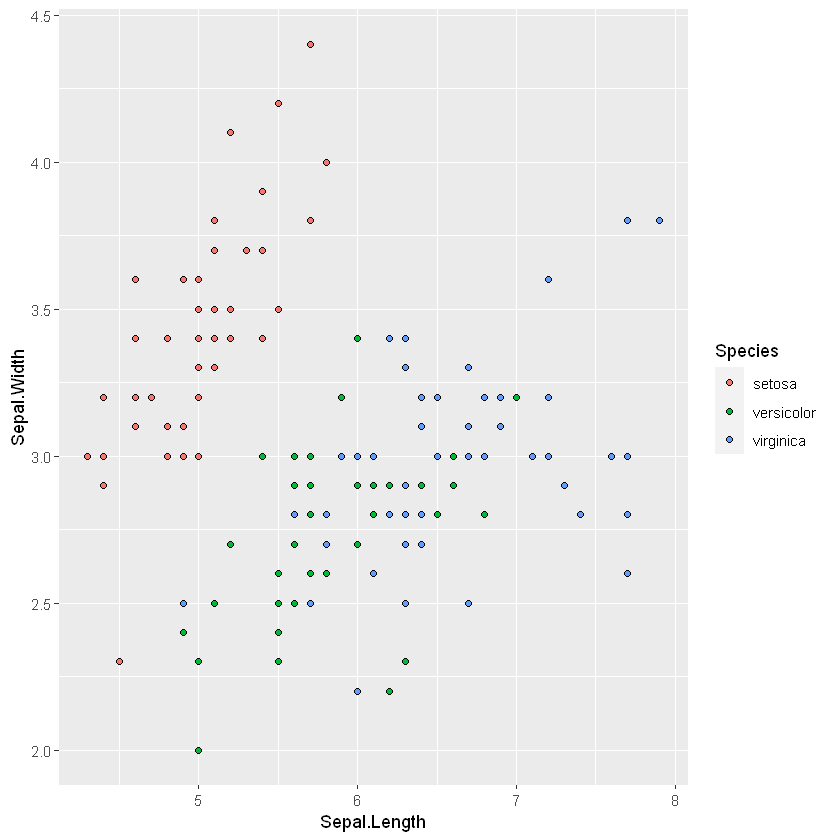

In [13]:
ggplot(iris, aes(Sepal.Length, Sepal.Width, fill = Species)) +
geom_point(shape = 21, color = 'black')

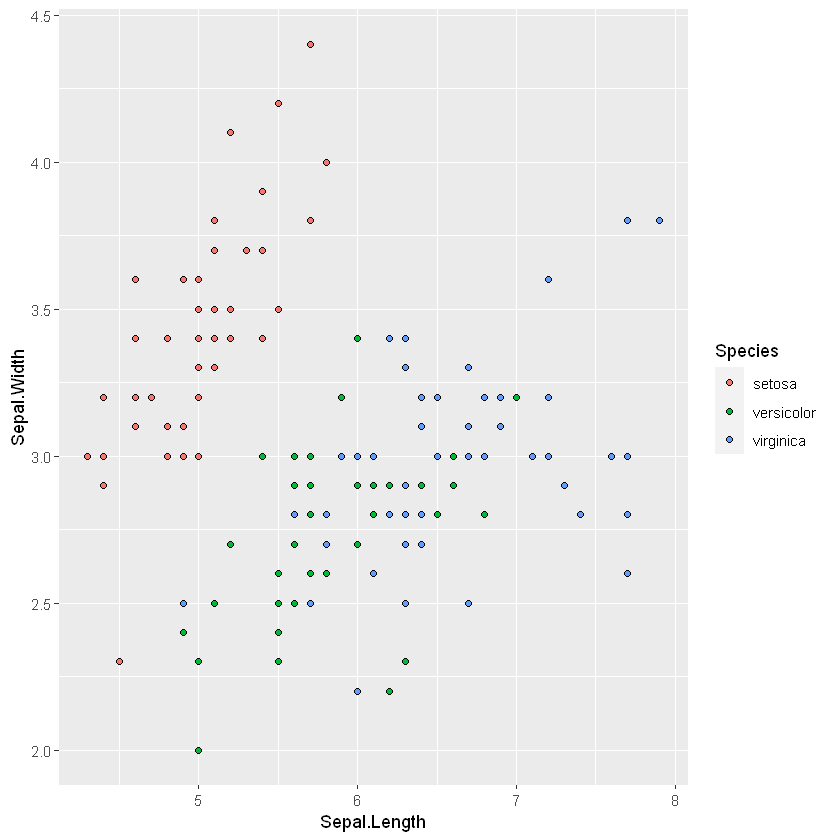

In [14]:
#Produce the same picture as above
ggplot(iris, aes(Sepal.Length, Sepal.Width, fill = Species)) +
geom_point(position = position_identity(), 
           shape = 21,
           color = 'black'
          )

# Dodge overlapping objects side-to-side

Dodging preserves the vertical position of an geom while adjusting the horizontal position.  
**`position_dodge()`**:  requires the grouping variable to be be specified in the global or `geom_*` layer.  
**`position_dodge2()`**: Unlike `position_dodge()`, works without a grouping variable in a layer. `position_dodge2()` works with bars and rectangles, but is particulary useful for arranging box plots, which can have variable widths.

```R
position_dodge(width = NULL, preserve = c("total", "single"))

position_dodge2(
  width = NULL,
  preserve = c("total", "single"),
  padding = 0.1,
  reverse = FALSE
)
```

**Arguments**  
`width`	
Dodging width, when different to the width of the individual elements. This is useful when you want to align narrow geoms with wider geoms. See the examples.

`preserve`	
Should dodging preserve the total width of all elements at a position, or the width of a single element?

`padding`	
Padding between elements at the same position. Elements are shrunk by this proportion to allow space between them. Defaults to 0.1.

`reverse`	
If TRUE, will reverse the default stacking order. This is useful if you're rotating both the plot and legend.

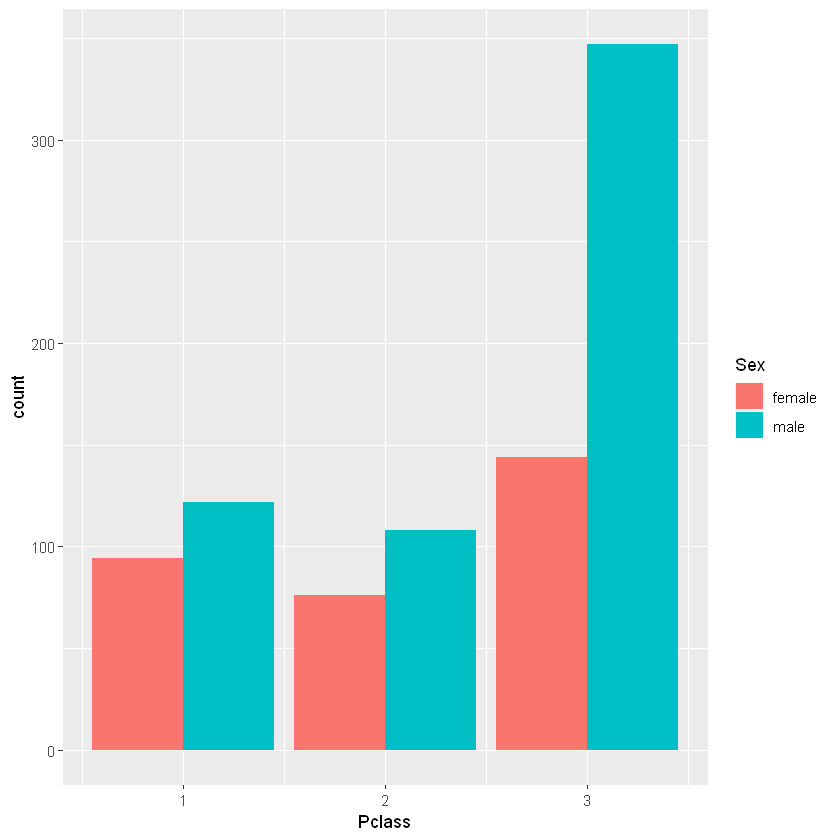

In [17]:
#The number of males and females in each Pclass
ggplot(titanic, aes(Pclass, fill = Sex)) +
geom_bar(position = 'dodge') #equivalent, use: position = position_dodge()

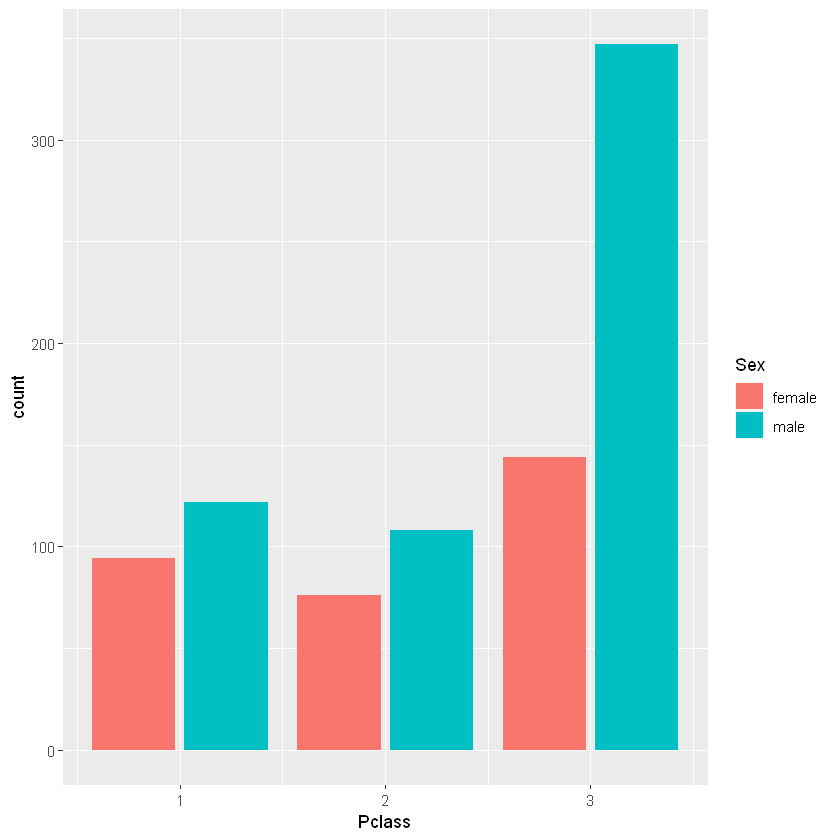

In [18]:
#position_dodge2()
ggplot(titanic, aes(Pclass, fill = Sex)) +
geom_bar(position = position_dodge2())

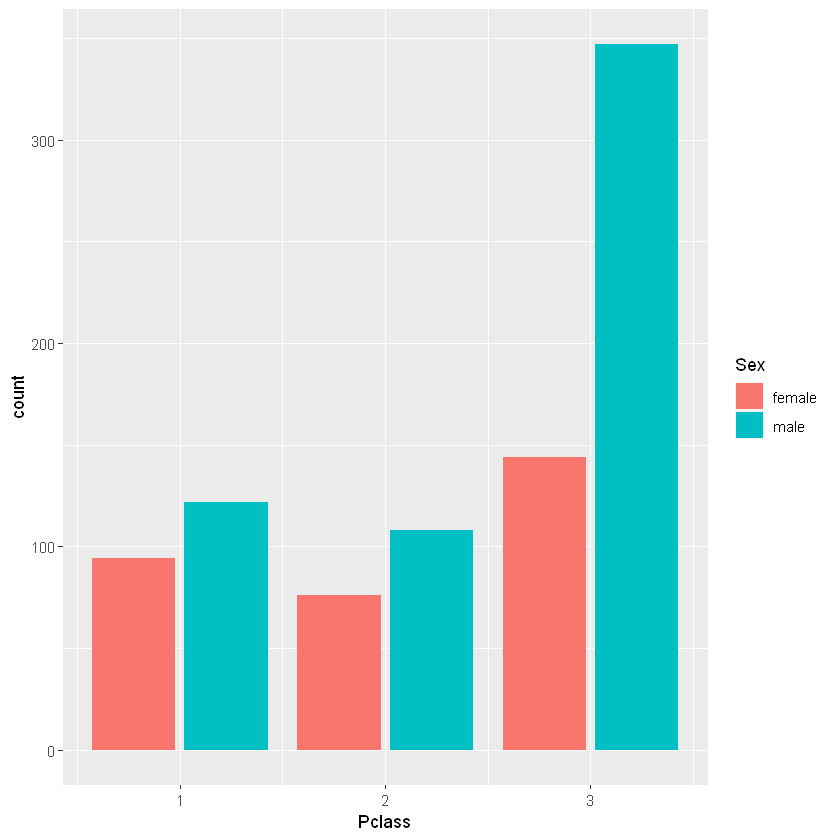

In [23]:
# By default, dodging with `position_dodge2()` preserves the total width of
# the elements. You can choose to preserve the width of each element with:
ggplot(titanic, aes(Pclass, fill = Sex)) +
geom_bar(position = position_dodge2(preserve = 'single'))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


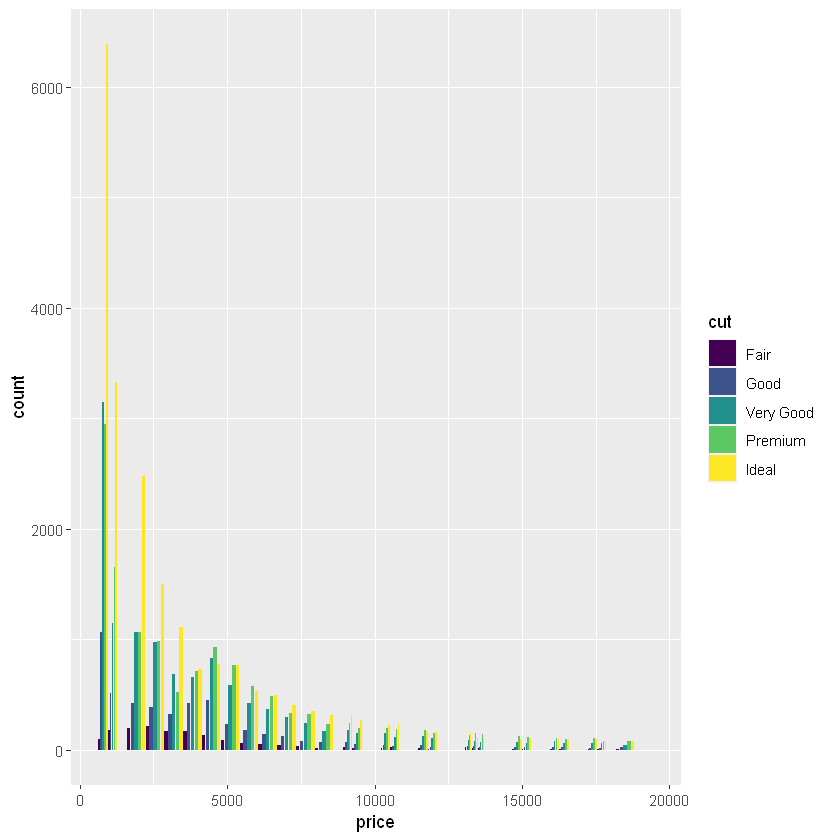

In [28]:
ggplot(diamonds, aes(price, fill = cut)) +
geom_histogram(position = 'dodge2')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


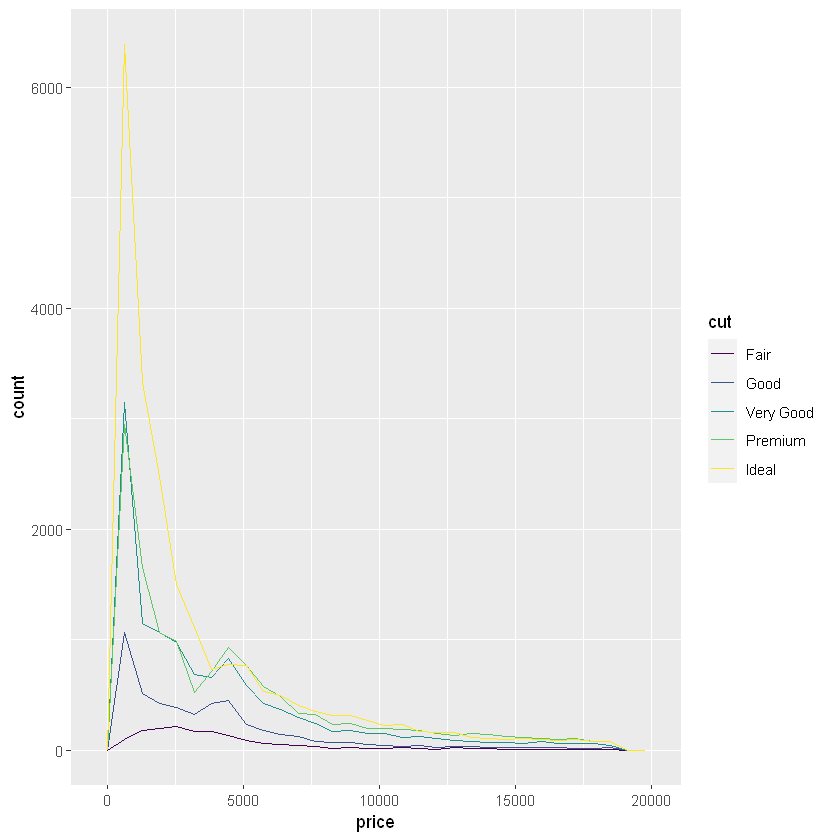

In [30]:
# In this case a frequency polygon is probably a better choice
ggplot(diamonds, aes(price, color = cut)) +
geom_freqpoly()

<hr>

**Dodging with various widths** 

  x y g
1 a 2 1
2 a 3 2
3 b 4 1
4 b 5 2


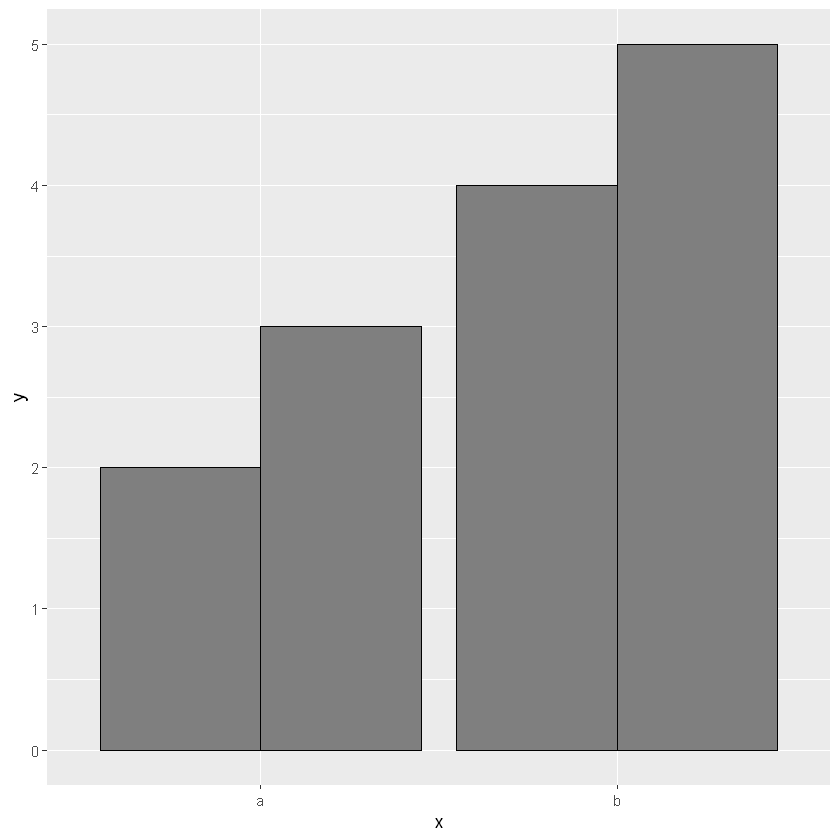

In [35]:
# To dodge items with different widths, you need to be explicit
df <- data.frame(x = c("a","a","b","b"), y = 2:5, g = rep(1:2, 2))
print(df)

p <- ggplot(df, aes(x, y, group = g)) +
  geom_col(position = "dodge", fill = "grey50", colour = "black")
p

Warning message:
"Width not defined. Set with `position_dodge(width = ?)`"

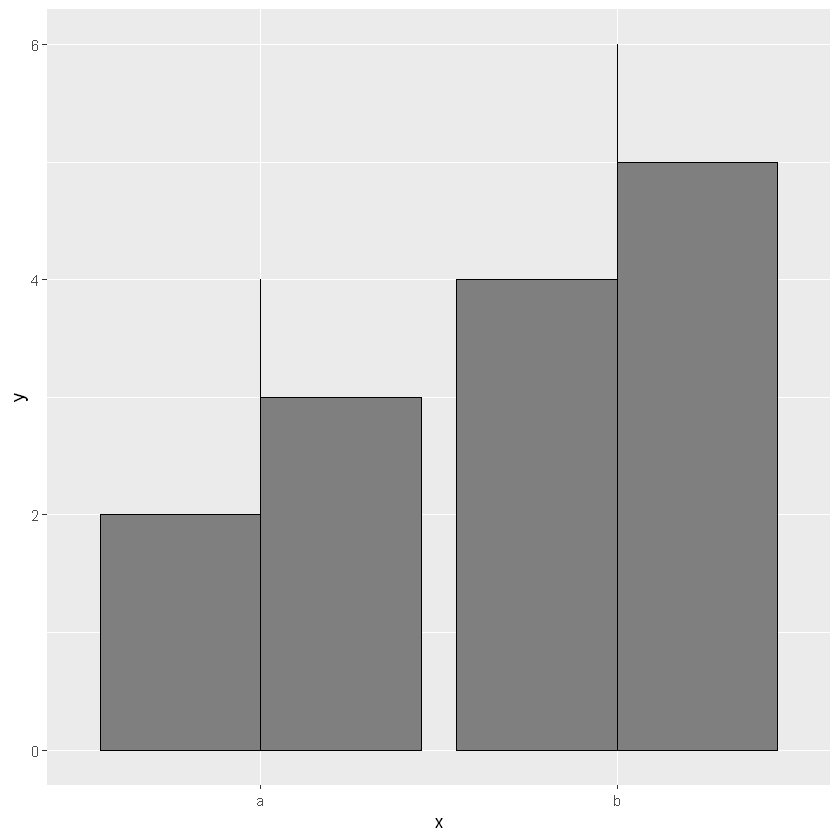

In [38]:
# A line range has no width:
p + geom_linerange(aes(ymin = y - 1, ymax = y + 1), position = "dodge")


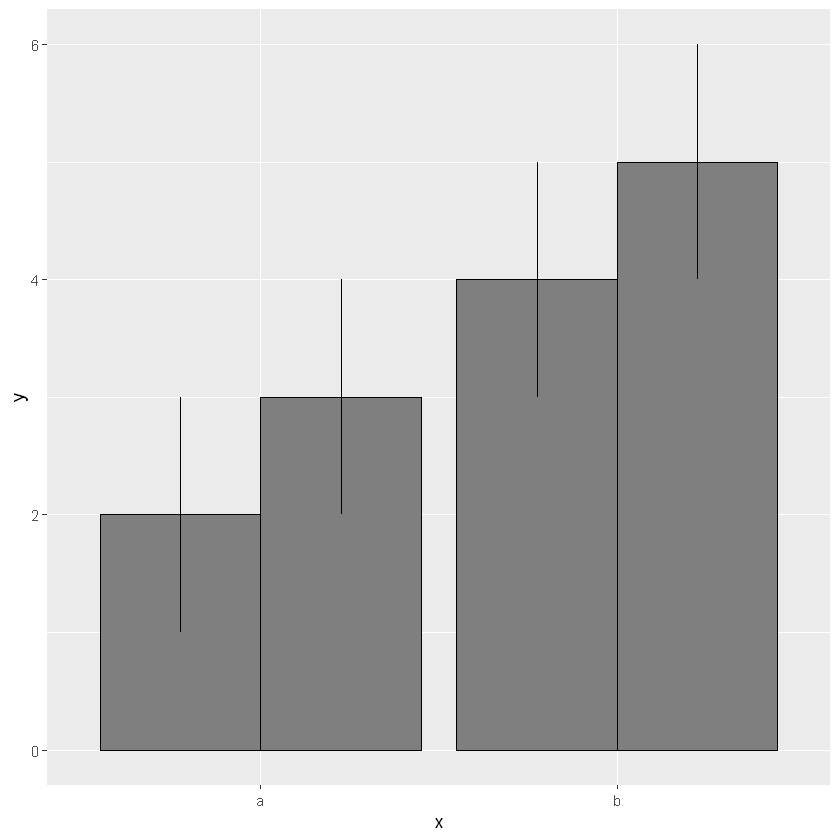

In [37]:
# So you must explicitly specify the width
p + geom_linerange(
  aes(ymin = y - 1, ymax = y + 1),
  position = position_dodge(width = 0.9)
)


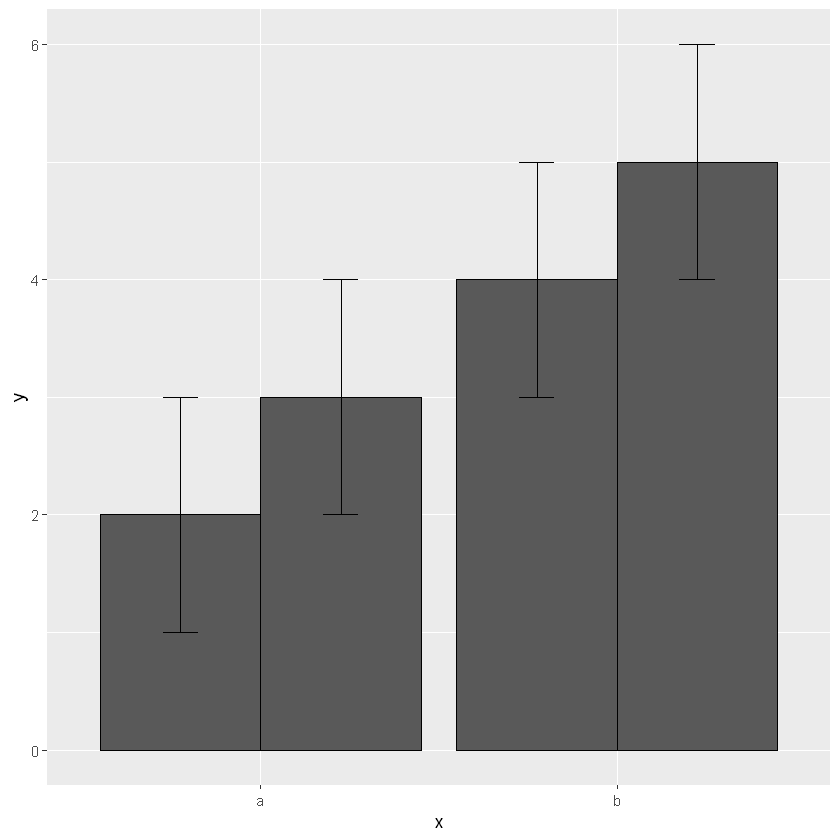

In [46]:
# The same principle applies to error bars, which are usually
# narrower than the bars
ggplot(df, aes(x, y, group = g)) +
geom_col(position = 'dodge', color = 'black') +
geom_errorbar(aes(ymin = y - 1, ymax = y + 1), 
              width = .2,                      #the width of the cap on error bar
              position = position_dodge(width = .9)
)

Warning message:
"Can't preserve total widths when varwidth = TRUE."

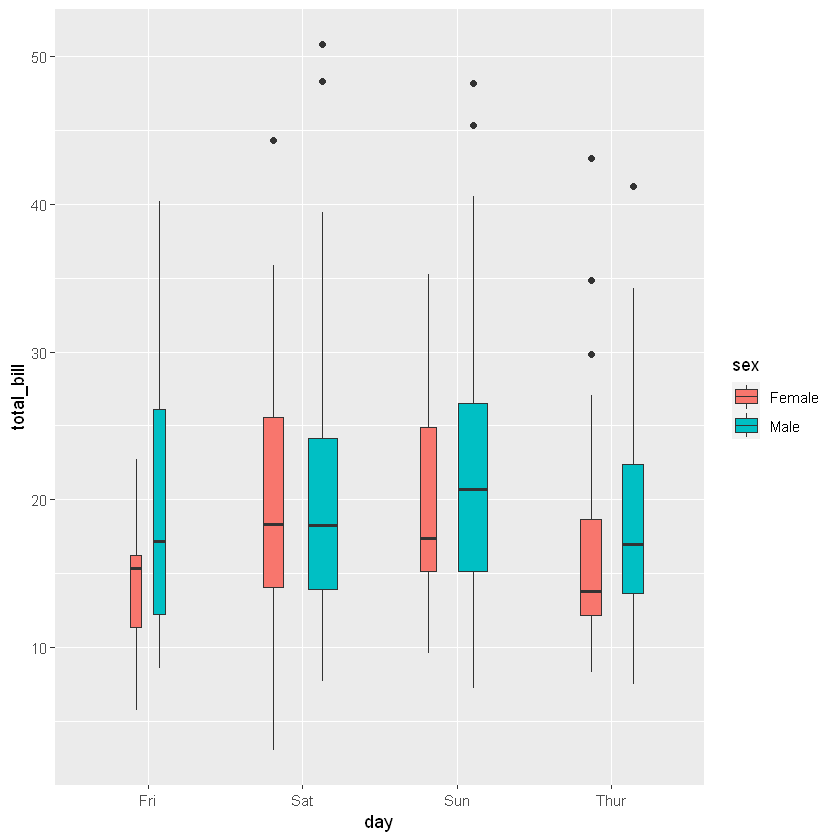

In [11]:
# Box plots use position_dodge2 by default, and bars can use it too
ggplot(tips, aes(day, total_bill, fill = sex)) +
geom_boxplot(varwidth = TRUE, position = position_dodge2(padding = .5))

<hr>

**Preserve**

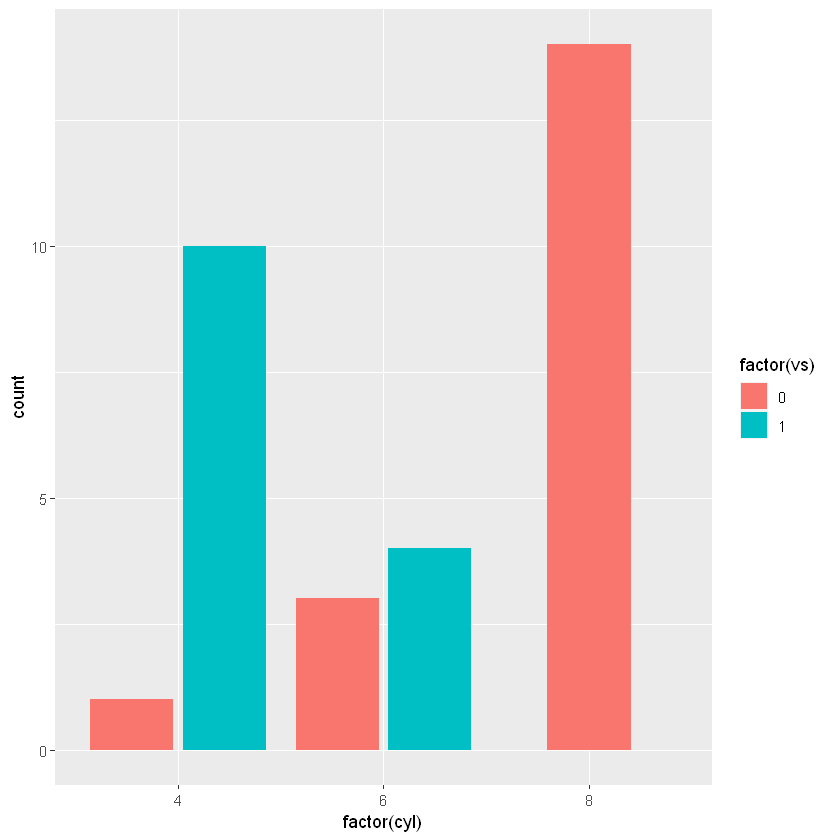

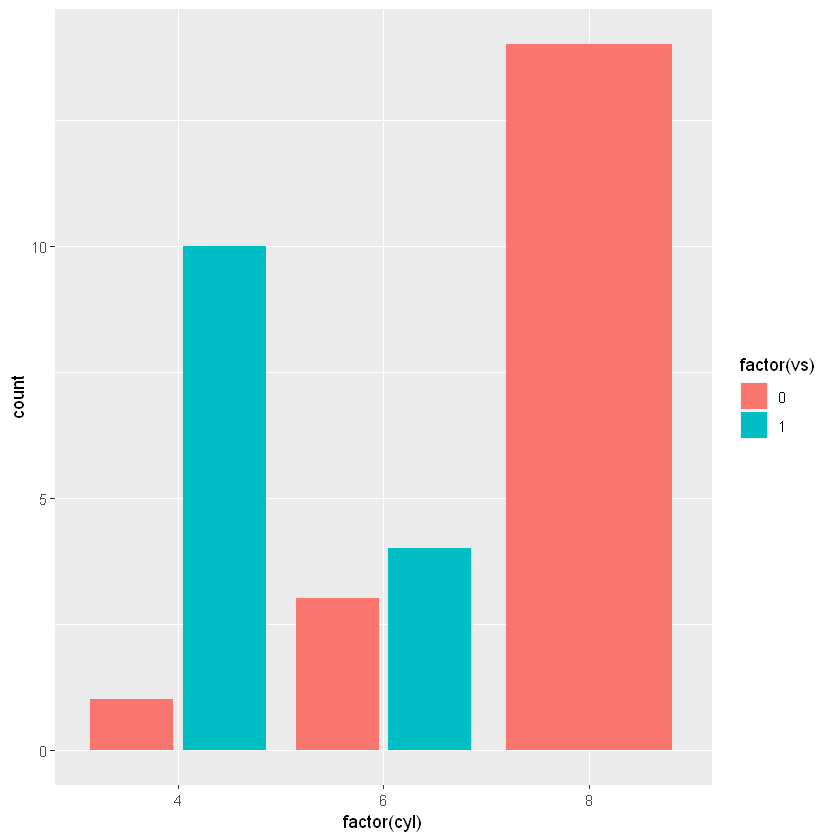

In [52]:
#Preserve = 'single' vs #Preserve = 'Total'
ggplot(mtcars, aes(factor(cyl), fill = factor(vs))) +
  geom_bar(position = position_dodge2(preserve = "single"))

ggplot(mtcars, aes(factor(cyl), fill = factor(vs))) +
  geom_bar(position = position_dodge2(preserve = "total"))


<hr>

**padding**

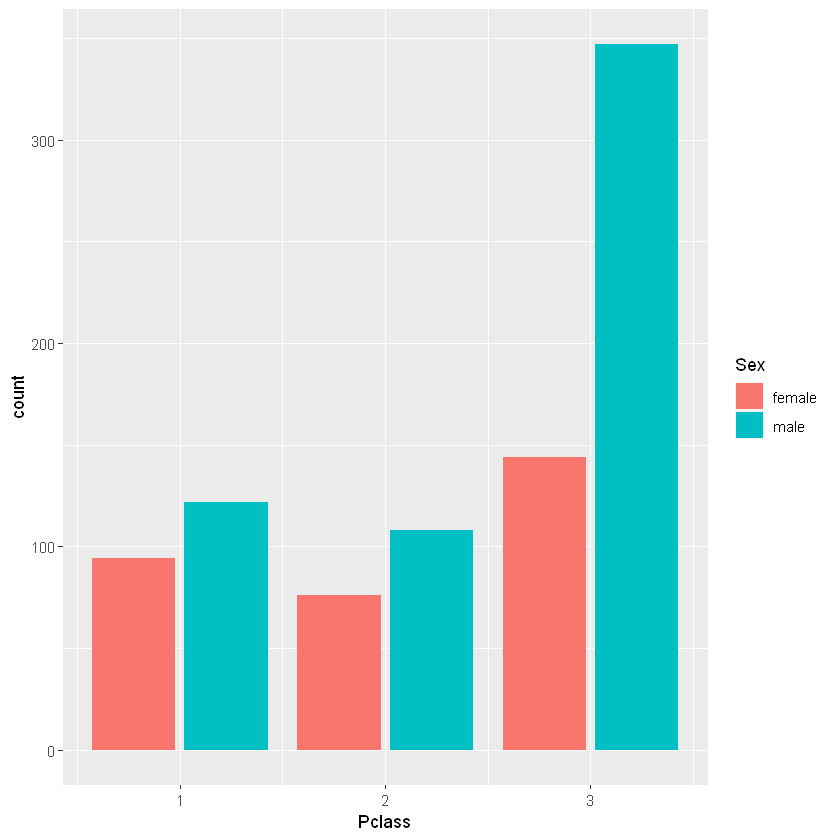

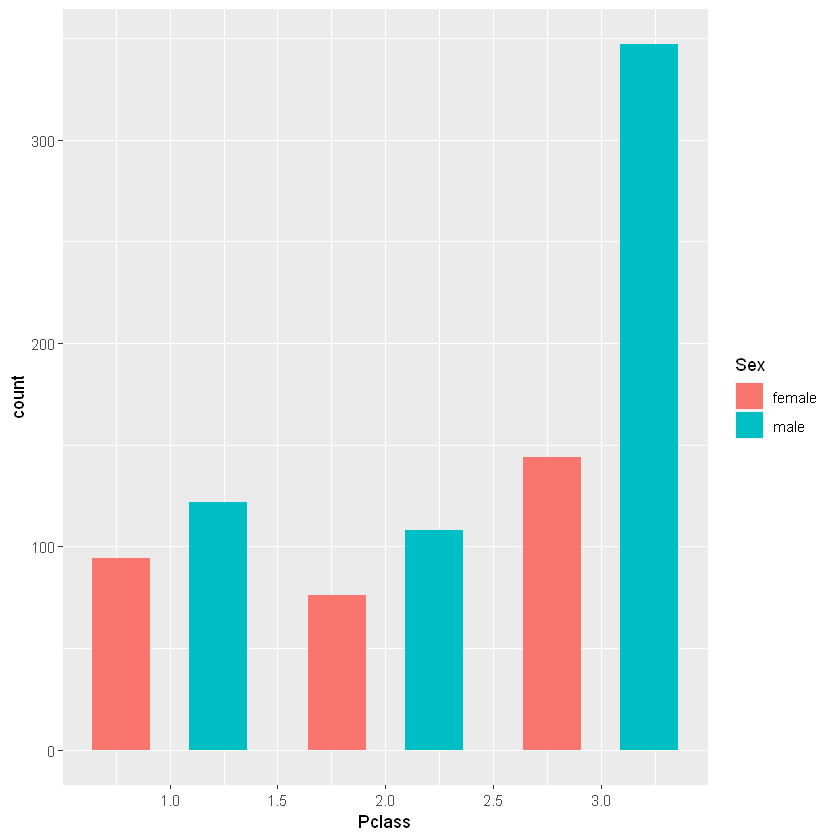

In [57]:
fig <- ggplot(titanic, aes(Pclass, fill = Sex))
#For large padding, the space between bars in the same group will be large
fig + geom_bar(position = position_dodge2(padding = .1))
fig + geom_bar(position = position_dodge2(padding = .4))

<hr>

**reverse**: reverse hue order

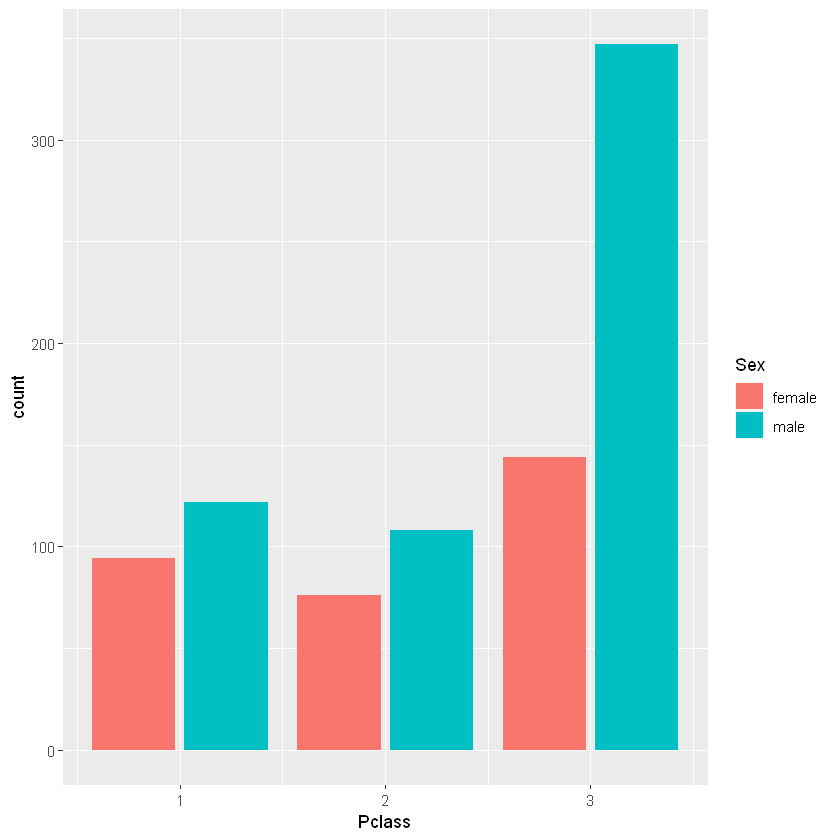

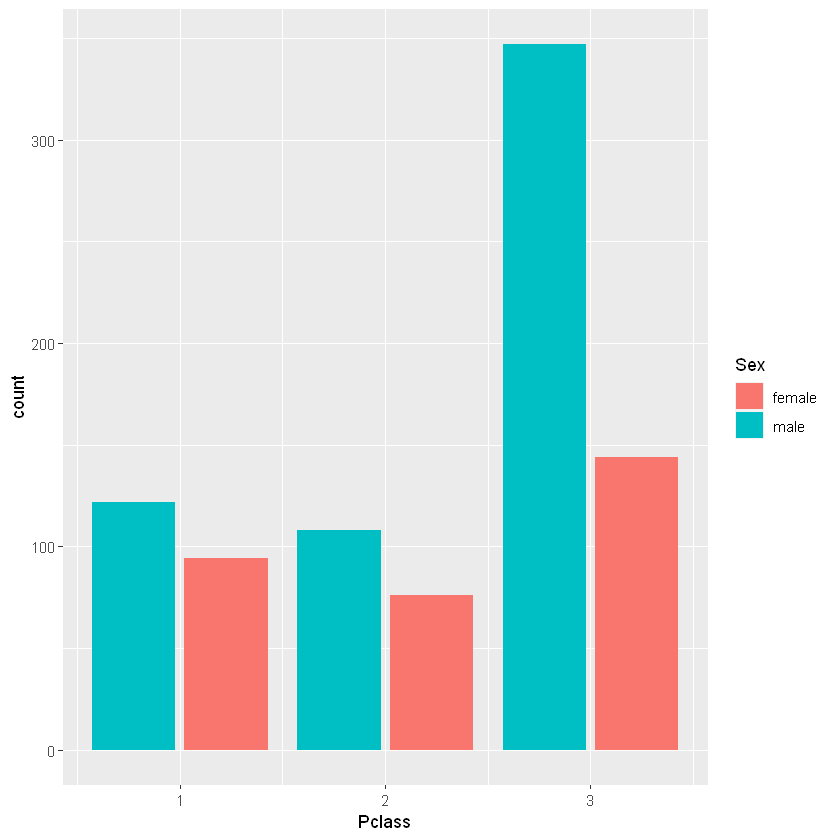

In [7]:
fig <- ggplot(titanic, aes(Pclass, fill = Sex))

fig + geom_bar(position = position_dodge2()) 
fig + geom_bar(position = position_dodge2(reverse = TRUE)) 